In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.activations import linear, relu, sigmoid
import os
from feature import extract_features
import librosa
from sklearn import preprocessing
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
txt_path = 'UBMenrolldata.txt'
file_paths = open(txt_path,'r')
ID = []
for path in file_paths:
    path = path.strip()
    ID.append(int(path[10:13]))
ID = list(set(ID))
ID.sort()
print(ID)
print(len(ID))

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117, 118, 122, 128, 131, 132, 134, 135, 136, 138, 201, 203, 204, 205, 206, 207, 208, 301, 302, 303, 304, 305, 306, 307, 308, 309, 312, 313, 314, 315, 317, 318, 319, 320, 321, 322, 323, 324, 402, 404, 405, 406, 407, 408, 412, 413, 414, 501, 504, 506, 507, 508, 511, 512, 513, 516, 517, 519, 520, 521, 522, 523, 524, 525, 526, 527, 534, 539, 540, 541, 546, 547, 548, 550, 553, 554, 563, 565, 568, 569, 572, 573, 575, 576, 577, 578, 579, 582, 585, 588, 589, 591, 595, 596, 597, 598, 601, 602, 605, 607, 610, 612, 617, 622, 623, 626, 629, 631, 634, 637, 638, 646, 651, 653, 655, 663, 666, 667, 668, 669, 670, 671, 672, 675, 676, 677, 679, 680, 682, 683, 684, 685, 686, 688, 689, 692, 695, 696, 697, 698, 699, 704, 705, 708, 709, 714, 715, 716, 717, 728, 729, 730, 731, 732, 735, 737, 738, 742, 743, 744, 745, 746, 749, 751, 756, 757, 760, 761, 762, 763, 766, 769, 770, 771, 774, 775, 777, 779, 780, 781, 782, 783, 784, 785, 786, 788,

In [3]:
index = []
for i in range(len(ID)):
    index.append(i)
print(index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218]


# Generate feature for training

In [4]:
frame_len = 50
feature_train = np.ones(shape=(1,50*frame_len))
target_train = []

file_paths = open(txt_path,'r')

for path in file_paths:
    path = path.strip()
    audio, sr = librosa.load(path,sr=None)
    feature = extract_features(audio, sr)
    stack = np.asarray(())
    count = 1
    frame_num = feature.shape[0]-50
    
    for j in range(1,frame_num,25):
        stack1 = feature[j:j+50].reshape(1,50*frame_len)
        feature_train = np.vstack((feature_train,stack1))
        target_train.append(index[ID.index(int(path[10:13]))])
        stack2 = feature[-j-50:-j].reshape(1,50*frame_len)
        feature_train = np.vstack((feature_train,stack2))
        target_train.append(index[ID.index(int(path[10:13]))])

feature_train = feature_train[1:]

print(feature_train.shape)
print(len(target_train))

(6522, 2500)
6522


In [7]:
onehot = to_categorical(np.array(target_train), num_classes = 219)
print(onehot)
print(onehot.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(6522, 219)


# Development

In [8]:
network = Sequential()

In [10]:
#network.add(layers.Dropout(0.2,input_shape=(feature_train.shape[1],)))
network.add(Dense(units=512, activation='relu',input_shape=(feature_train.shape[1],)))
network.add(Dense(units=512, activation='relu'))
network.add(Dense(units=512, activation='relu'))
network.add(Dense(units=512, activation='relu'))
network.add(Dense(units=512, activation='relu'))
network.add(Dropout(0.1))
network.add(Dense(units=onehot.shape[1], activation='softmax'))

In [11]:
network.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

In [12]:
network.fit(feature_train,
           onehot,
           epochs=80)

Epoch 1/80
204/204 [==============================] - 5s 8ms/step - loss: 5.2496 - accuracy: 0.0175
Epoch 2/80
204/204 [==============================] - 2s 8ms/step - loss: 4.2180 - accuracy: 0.1009
Epoch 3/80
204/204 [==============================] - 2s 8ms/step - loss: 2.7341 - accuracy: 0.3086
Epoch 4/80
204/204 [==============================] - 2s 8ms/step - loss: 1.6621 - accuracy: 0.5274
Epoch 5/80
204/204 [==============================] - 2s 8ms/step - loss: 0.9987 - accuracy: 0.7076
Epoch 6/80
204/204 [==============================] - 2s 8ms/step - loss: 0.7057 - accuracy: 0.7883
Epoch 7/80
204/204 [==============================] - 2s 8ms/step - loss: 0.4931 - accuracy: 0.8511
Epoch 8/80
204/204 [==============================] - 2s 8ms/step - loss: 0.4277 - accuracy: 0.8732
Epoch 9/80
204/204 [==============================] - 2s 8ms/step - loss: 0.3180 - accuracy: 0.9066
Epoch 10/80
204/204 [==============================] - 2s 8ms/step - loss: 0.2765 - accuracy: 0.9230

# Enrollment

In [13]:
model = Sequential()
for layer in network.layers[:-2]:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1280512   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
Total params: 2,331,136
Trainable params: 0
Non-trainable params: 2,331,136
_________________________________________________________________


In [14]:
train_file = 'enrolldata1.txt'
file_paths = open(train_file,'r')

D_buffer = []
enroll_id = []

for path in file_paths:
    path = path.strip()
    audio, sr = librosa.load(path,sr=None)
    feature = extract_features(audio, sr)
    d = np.zeros(shape=(1,512))
    for j in range(1,25,5):
        stack1 = feature[j:j+50].reshape(1,50*frame_len)
        stack2 = feature[-j-50:-j].reshape(1,50*frame_len)
        stack3 = feature[-j-50-2:-j-2].reshape(1,50*frame_len)
        d = d + preprocessing.normalize(model.predict(stack1),norm='l2')+preprocessing.normalize(model.predict(stack2),norm='l2')+preprocessing.normalize(model.predict(stack3),norm='l2')
    D_buffer.append(d)
    enroll_id.append(int(path[10:13]))
print(len(D_buffer))
print(enroll_id)
print(len(enroll_id))

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
288
[101, 101, 101, 101, 102, 102, 102, 102, 103, 103, 103, 103, 104, 104, 104, 104, 105, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 107, 108, 108, 108, 108, 109, 109, 109, 109, 110, 110, 110, 110, 111, 111, 111, 111, 113, 113, 113, 113, 115, 115, 115, 115, 117, 117, 117, 117, 118, 118, 118, 118, 122, 122, 122, 122, 128, 128, 128, 128, 132, 132, 132, 132, 134, 134, 134, 134, 135, 135, 135, 135, 136, 136, 136, 136, 138, 138, 138, 138, 201, 201, 201, 201, 203, 203, 203, 203, 205, 205, 205, 205, 207, 207, 207, 207, 402, 402, 402, 402, 404, 404, 404, 404, 406, 406, 406, 406, 407, 407, 407, 407, 412, 412, 412, 412, 413, 413, 413, 413, 414, 414, 414, 414, 504, 504, 504, 504, 507, 507, 507, 507, 524, 524, 524, 524, 548, 548, 548, 548, 550, 550, 550, 550, 569, 569, 569, 569, 576, 576, 576, 576, 577, 577, 577, 577, 578, 578, 578, 578, 579, 579, 579, 579, 607, 607, 607, 607, 617, 617, 617, 617, 622, 622, 622, 622, 626, 626, 626, 626, 629

In [15]:
D_vector = []
for i in range(0,len(enroll_id),4):
    D_vector.append((D_buffer[i]+D_buffer[i+1]+D_buffer[i+2]+D_buffer[i+3])/4)

In [16]:
print(len(D_vector))

72


# Evaluation

In [17]:
test_file = 'testdata1.txt'
file_paths = open(test_file,'r')

d_test = []
test_id = []

for path in file_paths:
    path = path.strip()
    audio, sr = librosa.load(path,sr=None)
    feature = extract_features(audio, sr)
    d = np.zeros(shape=(1,512))
    for j in range(1,25,5):
        stack1 = feature[j:j+50].reshape(1,50*frame_len)
        stack2 = feature[-j-50:-j].reshape(1,50*frame_len)
        stack3 = feature[-j-50-2:-j-2].reshape(1,50*frame_len)
        d = d + preprocessing.normalize(model.predict(stack1),norm='l2')+preprocessing.normalize(model.predict(stack2),norm='l2')+preprocessing.normalize(model.predict(stack3),norm='l2')
    d_test.append(d)
    test_id.append(int(path[10:13]))
print(len(d_test))
print(test_id)
print(len(test_id))

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step
72
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 115, 117, 118, 122, 128, 132, 134, 135, 136, 138, 201, 203, 205, 207, 402, 404, 406, 407, 412, 413, 414, 504, 507, 524, 548, 550, 569, 576, 577, 578, 579, 607, 617, 622, 626, 629, 653, 668, 679, 685, 688, 689, 692, 698, 714, 715, 717, 735, 737, 738, 742, 762, 763, 766, 769, 770, 771, 774, 781, 784]
72


[0, 1, 2, 3, 4, 5, 6, 7, 8, 35, 10, 11, 10, 13, 14, 15, 16, 17, 18, 14, 20, 21, 22, 23, 24, 25, 2, 27, 28, 33, 30, 31, 16, 33, 33, 35, 3, 37, 38, 39, 40, 41, 41, 29, 44, 13, 26, 68, 48, 7, 22, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 37, 10, 42, 65, 33, 48, 68, 69, 70, 71]
Accuracy 0.7222222222222222


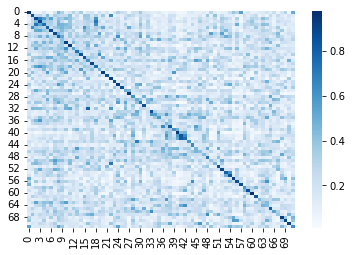

In [19]:
x_axis = [i for i in range(72)]
y_axis = [j for j in range(72)]
heat_data = np.zeros((72,72))
pre = []
i = 0
for dtest in d_test:
    vector = []
    for j in range(len(D_vector)):
        m = np.dot(dtest,D_vector[j].T)/(np.linalg.norm(dtest)*np.linalg.norm(D_vector[j]))
        vector.append(m)
    heat_data[i] = np.array(vector).reshape(1,72)
    pre.append(np.argmax(vector))
    i = i+1
    
print(pre)
counter = 0
for i in range(len(pre)):
    if pre[i] == i:
        counter = counter+1
print('Accuracy',counter/len(pre))
sns.heatmap(heat_data, cmap='Blues')
plt.show()

1/1 [==============================] - 0s 24ms/step
102/5Vtest as ----113
1/1 [==============================] - 0s 16ms/step
104/5Vtest as ----131
1/1 [==============================] - 0s 24ms/step
105/5Vtest as ----402
1/1 [==============================] - 0s 19ms/step
106/5Vtest as ----110
1/1 [==============================] - 0s 16ms/step
108/5Ttest as ----756
1/1 [==============================] - 0s 16ms/step
109/5Otest as ----738
1/1 [==============================] - 0s 16ms/step
110/4Vtest as ----698
1/1 [==============================] - 0s 16ms/step
111/5Vtest as ----406
1/1 [==============================] - 0s 24ms/step
115/5Etest as ----576
1/1 [==============================] - 0s 16ms/step
118/5Etest as ----524
1/1 [==============================] - 0s 16ms/step
122/5Vtest as ----134
1/1 [==============================] - 0s 17ms/step
128/5Vtest as ----207
1/1 [==============================] - 0s 24ms/step
132/5Vtest as ----115
1/1 [==============================] -

1/1 [==============================] - 0s 20ms/step


101


[[ 1  2  3  4  5  6  7  8  9 10 11 12]]


0
2
4
6
8


[6 7 8]
